In [2]:
import numpy as np

FISHER_COLOR = 'r'
FISHER_SQRT_COLOR = 'm'
ENTROPY_COLOR = 'b'
ERROR_COLOR = 'g'

T_STEP = 0.0002

def get_fisher(t):
    return np.array(t*(1-t))
def get_fisher_der1(t):
    return np.array(1-2*t)
def get_fisher_der2(t):
    return np.array(list(map(lambda x: -2, t)))
def get_fisher_ratio(t):
    return np.array(get_fisher_der2(t)/get_fisher_der1(t))

def get_fisherSqrt(t):
    return np.array((t*(1-t))**0.5)
def get_fisherSqrt_der1(t):
    return np.array((1-2*t)/(2*(t*(1-t))**0.5))
def get_fisherSqrt_der2(t):
    return np.array(-1/(4*(t*(1-t))**1.5))
def get_fisherSqrt_ratio(t):
    return np.array(get_fisherSqrt_der2(t)/get_fisherSqrt_der1(t))

def get_entropy(t):
    t = t[1:-1]
    return np.array(np.append(np.append(0, -t*np.log(t)-(1-t)*np.log(1-t)), 0))
def get_entropy_der1(t):
    return np.array(np.log(1-t) - np.log(t))
def get_entropy_der2(t):
    return np.array(1/(t*(t-1)))
def get_entropy_ratio(t):
    return np.array(get_entropy_der2(t)/get_entropy_der1(t))

def get_error(t):
    return np.array([t, 1-t]).min(axis=0)
def get_error_der1(t):
    return np.array(list(map(lambda x: 1 if x < 0.5 else -1, t)));
def get_error_der2(t):
    return np.array(list(map(lambda x: 0, t)));
def get_error_ratio(t):
    return np.array(get_error_der2(t)/get_error_der1(t))

def log(arr):
    return np.log(np.abs(np.array(arr)))

def get_min_arrays(arrays, factor = 1):
    minY = np.array(arrays).min(axis=0).min()
    return minY * factor

def get_max_arrays(arrays, factor = 1):
    maxY = np.array(arrays).max(axis=0).max()
    return maxY * factor

def new_figure():
    plt.figure(num=None, figsize=(16, 12), dpi=80)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def print_functions():

    t = np.append(np.arange(0., 1., T_STEP),1)
    print("len t: " + str(len(t)))

    fisher = get_fisher(t)
    fisherSqrt = get_fisherSqrt(t)
    entropy = get_entropy(t)
    error = get_error(t)

    new_figure()
    
    plt.plot(t, fisher, FISHER_COLOR, label="Fisher")
    plt.plot(t, fisherSqrt, FISHER_SQRT_COLOR, label="root-Fisher" )
    plt.plot(t, entropy, ENTROPY_COLOR, label="Binary Entropy")
    plt.plot(t, error, ERROR_COLOR, label="Error Function" )

    plt.legend(loc="upper left")
    plt.title('Admissible Functions on [0,1]')
    plt.ylim(0, get_max_arrays([fisher, fisherSqrt, entropy, error], 1.05))
    plt.xlabel('p',fontsize=16)
    plt.ylabel('f(p)',fontsize=16)
    plt.savefig('Admissible Functions.png')
    plt.show()

def print_functions_der1():
    t = np.arange(0., 1., T_STEP)
    t = t[1:]
    print("len t: " + str(len(t)))

    fisher_der1 = get_fisher_der1(t)
    fisherSqrt_der1 = get_fisherSqrt_der1(t)
    entropy_der1 = get_entropy_der1(t)
    error_der1 = get_error_der1(t)

    new_figure()

    plt.plot(t, fisher_der1, FISHER_COLOR, label="Fisher - First derivative" )
    plt.plot(t, fisherSqrt_der1, FISHER_SQRT_COLOR, label="root-Fisher - First derivative" )
    plt.plot(t, entropy_der1, ENTROPY_COLOR, label="Binary Entropy - First derivative" )
    plt.plot(t, error_der1, ERROR_COLOR, label="Error probability - First derivative" )

    plt.legend(loc="upper right")
    plt.title('Functions first derivatives')
    plt.xlabel('p',fontsize=16)
    plt.ylabel('df/dp',fontsize=16)

    minY = get_min_arrays([fisher_der1, fisherSqrt_der1, entropy_der1, error_der1], 0.25)
    maxY = get_max_arrays([fisher_der1, fisherSqrt_der1, entropy_der1, error_der1], 0.25)
    plt.ylim(minY, maxY)

    plt.savefig('First derivatives.png')
    plt.show()
    
def print_functions_der2():
    t = np.arange(0., 1., 0.0002)
    t = t[1:]
    print("len t: " + str(len(t)))

    fisher_der2 = get_fisher_der2(t)
    fisherSqrt_der2 = get_fisherSqrt_der2(t)
    entropy_der2 = get_entropy_der2(t)
    error_der2 = get_error_der2(t)

    new_figure()

    plt.plot(t, fisher_der2, FISHER_COLOR, label="Fisher - Second derivative" )
    plt.plot(t, fisherSqrt_der2, FISHER_SQRT_COLOR, label="root-Fisher - Second derivative" )
    plt.plot(t, entropy_der2, ENTROPY_COLOR, label="Binary Entropy - Second derivative" )
    plt.plot(t, error_der2, ERROR_COLOR, label="Error probability - Second derivative" )

    plt.legend(loc="upper left")
    plt.title('Functions second derivatives')
    plt.xlabel('p',fontsize=16)
    plt.ylabel('df^2/dp^2',fontsize=16)

    minY = get_min_arrays([fisher_der2, fisherSqrt_der2, entropy_der2, error_der2])
    maxY = get_max_arrays([fisher_der2, fisherSqrt_der2, entropy_der2, error_der2])
    plt.ylim(minY * 0.001, maxY + 15)

    plt.savefig('Second derivatives.png')
    plt.show()
    

def print_functions_der_ratio():
    t = np.arange(0., 0.5, T_STEP)
    t = t[1:]
    print("len t: " + str(len(t)))

    fisher_ratio = log(get_fisher_ratio(t))
    fisherSqrt_ratio = log(get_fisherSqrt_ratio(t))
    entropy_ratio = log(get_entropy_ratio(t))

    new_figure()

    plt.plot(t, fisher_ratio, FISHER_COLOR, label="Fisher - Derivatives ratio" )
    plt.plot(t, fisherSqrt_ratio, FISHER_SQRT_COLOR, label="root-Fisher - Derivatives ratio" )
    plt.plot(t, entropy_ratio, ENTROPY_COLOR, label="Binary Entropy - Derivatives ratio" )

    plt.legend(loc="upper left")
    plt.title('Not too concave condition - Log of Ratio')
    plt.xlabel('P',fontsize=16)
    plt.ylabel('Log(|Ratio|)',fontsize=16)
    plt.savefig('Too concave condition - Log of Ratio.png')
    plt.show()  

def print_functions_ratio_difference():

    t = np.arange(0., 0.5, T_STEP)
    t = t[1:]
    print("len t: " + str(len(t)))

    fisherSqrt_ratio = log(get_fisherSqrt_ratio(t))

    fisher_difference = log(get_fisher_ratio(t)) - fisherSqrt_ratio
    fisherSqrt_difference = fisherSqrt_ratio - fisherSqrt_ratio
    entropy_difference = log(get_entropy_ratio(t)) - fisherSqrt_ratio

    new_figure()

    plt.plot(t, fisher_difference, FISHER_COLOR, label="Fisher - Difference with root-Fisher log ratio" )
    plt.plot(t, fisherSqrt_difference, 'k' )
    plt.plot(t, entropy_difference, ENTROPY_COLOR, label="Binary Entropy - Difference with root-Fisher log ratio" )

    plt.ylim(-5, 0.4)

    plt.legend(loc="lower right")
    plt.title('Not too concave condition - Difference with root-Fisher log ratio')
    plt.xlabel('P',fontsize=16)
    plt.ylabel('Difference of log ratio',fontsize=16)
    plt.savefig('Too concave condition - Difference log ratio.png')
    plt.show()
    
def print_functions_ratio_of_ratios():

    t = np.arange(0., 0.5, T_STEP)
    t = t[1:]
    print("len t: " + str(len(t)))

    fisherSqrt_ratio = get_fisherSqrt_ratio(t)

    fisher_log_ratio = log(get_fisher_ratio(t) / fisherSqrt_ratio)
    fisherSqrt_log_ratio = log(fisherSqrt_ratio / fisherSqrt_ratio)
    entropy_log_ratio = log(get_entropy_ratio(t) / fisherSqrt_ratio)

    new_figure()

    plt.plot(t, fisher_log_ratio, FISHER_COLOR, label="Fisher - Log ratio of ratios with root-Fisher" )
    plt.plot(t, fisherSqrt_log_ratio, 'k' )
    plt.plot(t, entropy_log_ratio, ENTROPY_COLOR, label="Binary Entropy - Log ratio of ratios with root-Fisher" )

    plt.ylim(-2.5, 0.2)

    plt.legend(loc="lower right")
    plt.title('Not too concave condition - Log ratio of ratios with root-Fisher')
    plt.xlabel('P',fontsize=16)
    plt.ylabel('Log( | fRatio / root-FisherRatio | )',fontsize=16)
    plt.savefig('Too concave condition - Log ratio of ratios.png')
    plt.show()

len t: 5001


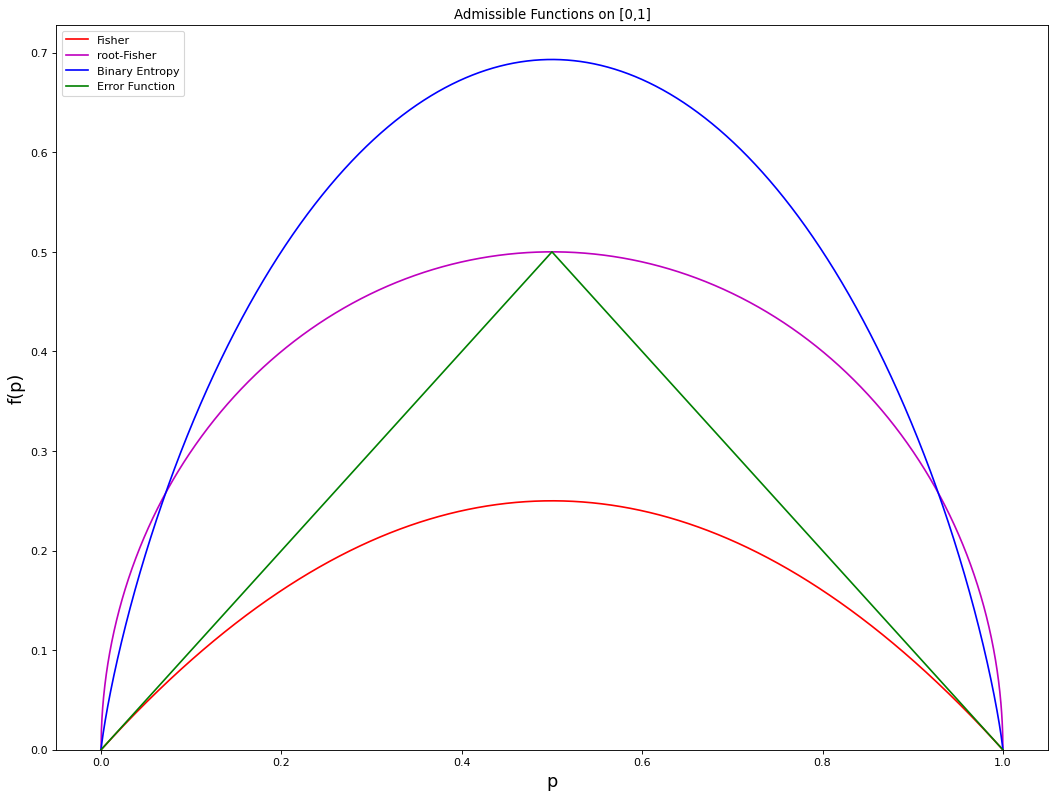

len t: 4999


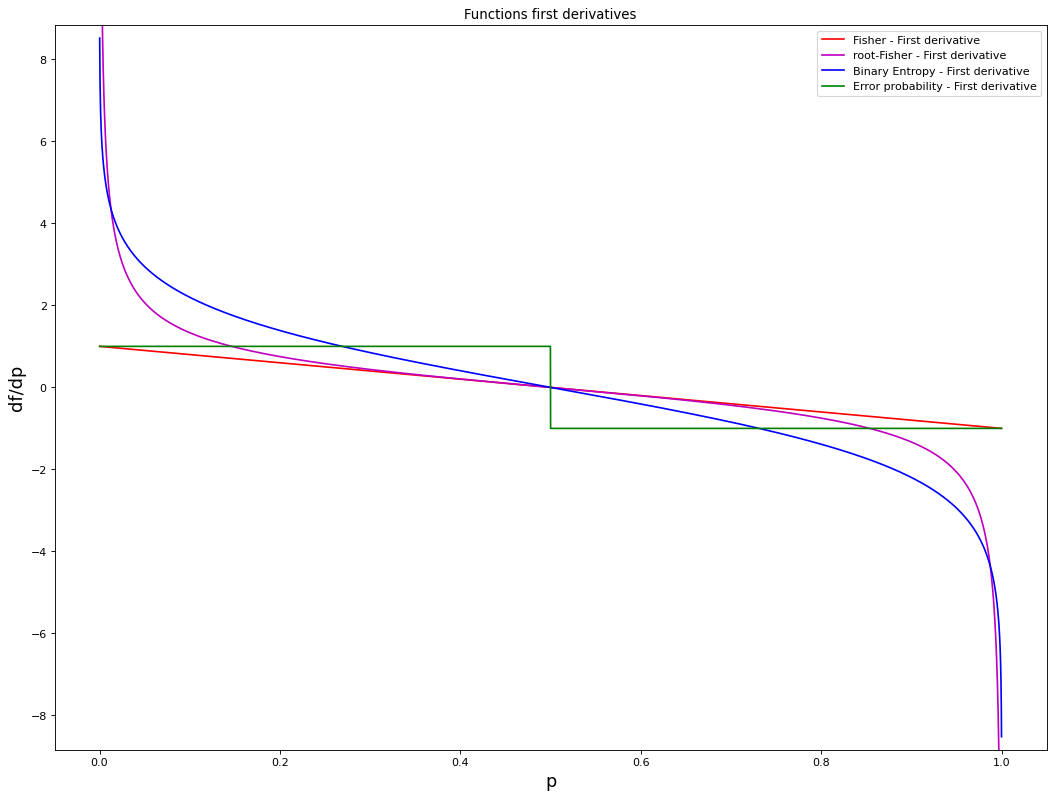

len t: 4999


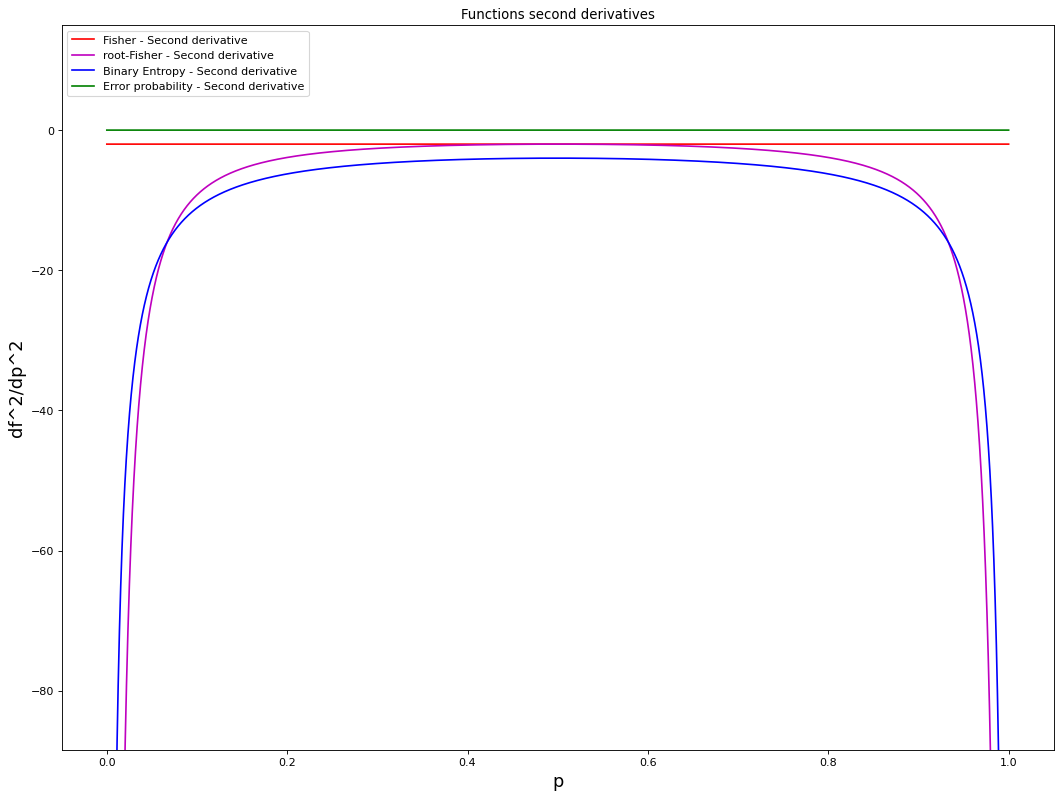

len t: 2499


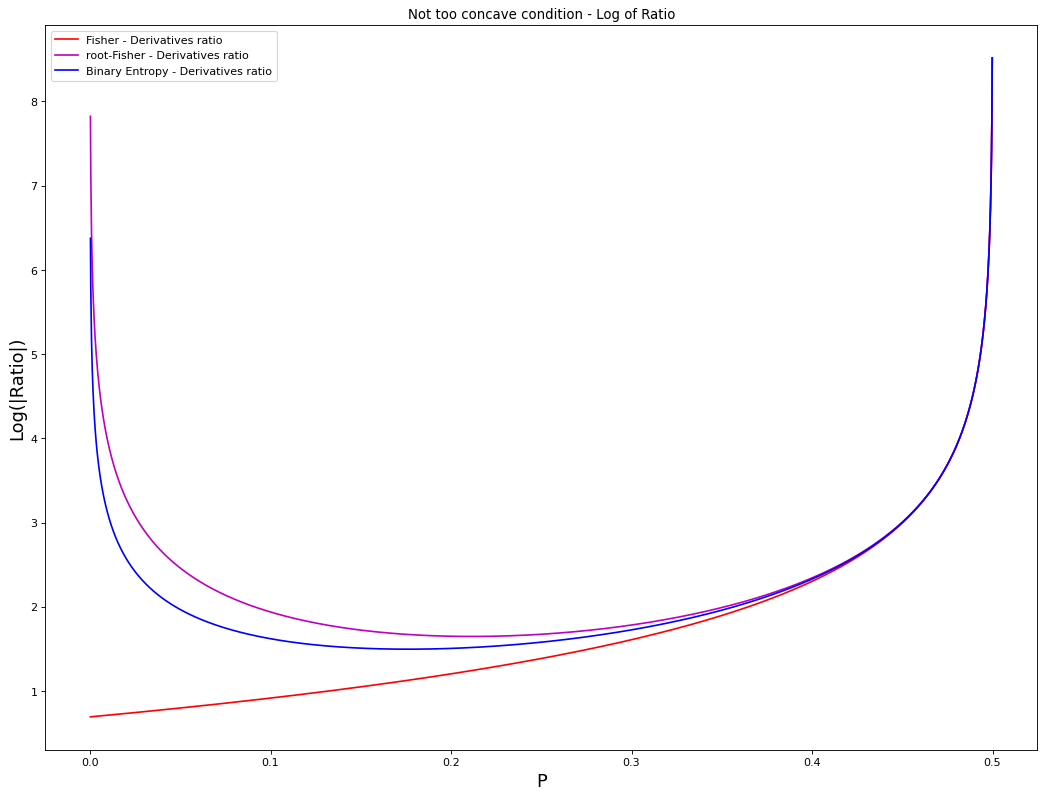

len t: 2499


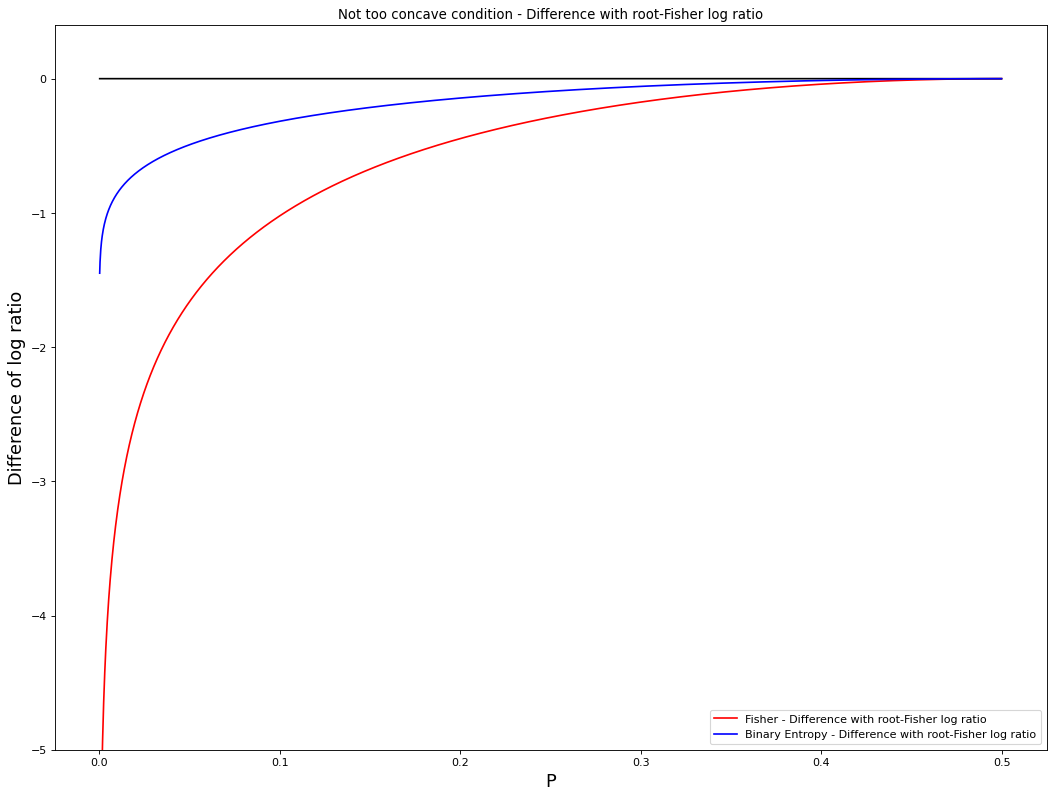

len t: 2499


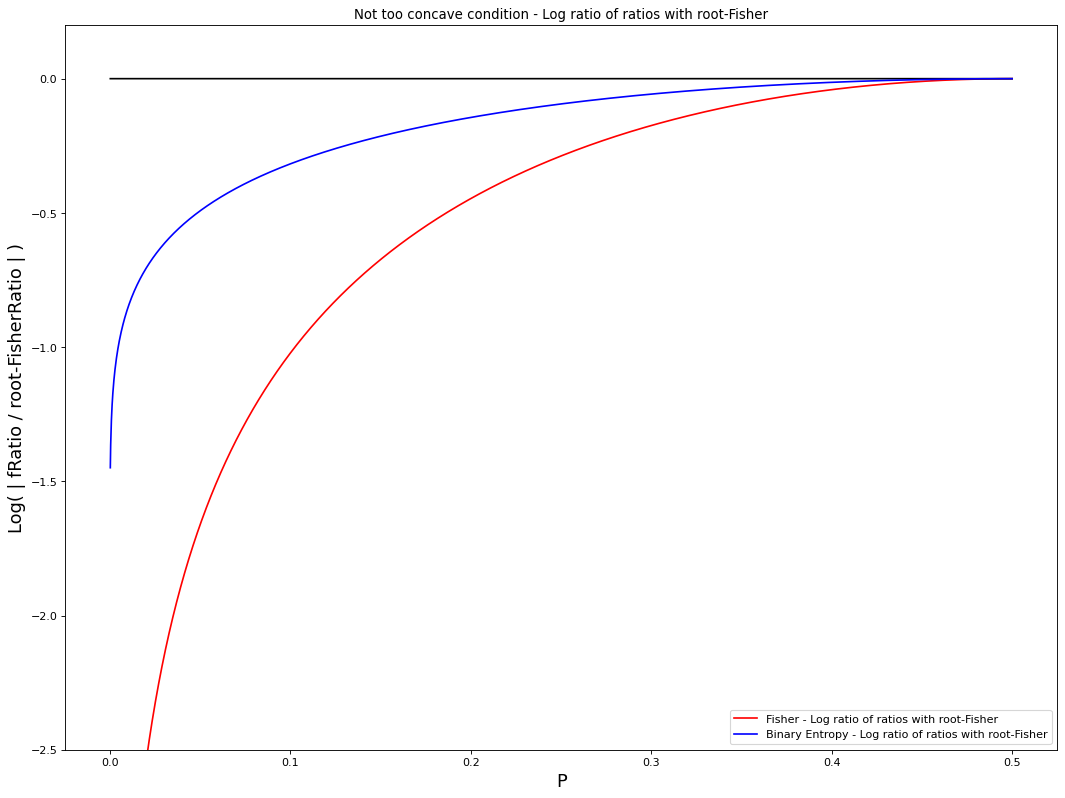

In [3]:
print_functions()
print_functions_der1()
print_functions_der2()
print_functions_der_ratio()
print_functions_ratio_difference()
print_functions_ratio_of_ratios()

In [6]:
import matplotlib as mpl
import matplotlib.font_manager as fm
print(fm.get_cachedir())

AttributeError: module 'matplotlib.font_manager' has no attribute 'get_cachedir'

In [14]:
import numpy as np
minError = lambda x: np.array([x,1-x]).min(0)
fisher = lambda x: x*(1-x)
delta = 0.0001
xs = np.arange(0.01, .5, delta)
print(fisher(xs))
print(minError(xs))

[0.0099     0.00999799 0.01009596 ... 0.24999991 0.24999996 0.24999999]
[0.01   0.0101 0.0102 ... 0.4997 0.4998 0.4999]


In [5]:
plt.show()